Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

--- Applying Polynomial Regression to Age and Income ---
Generated synthetic dataset for Age and Income.
Assumption: Income has a non-linear (quadratic-like) relationship with Age, plus noise.

Dataset sample (first 5 rows):
         Age         Income
0  47.440675  124835.914675
1  55.759468  120908.702195
2  50.138169  127793.623268
3  47.244159  134054.553937
4  41.182740  104609.859241

Dataset shape: (150, 2) (rows, columns)

Feature 'Age' (X) data type: float64
Target 'Income' (y) data type: float64

Training data shape: X_train=(120, 1), y_train=(120,)
Testing data shape: X_test=(30, 1), y_test=(30,)

Original X_train shape: (120, 1)
Transformed X_train_poly shape (with degree 3): (120, 3)
Example of original X_train[0]: [43.07396811]
Example of transformed X_train_poly[0]: [4.30739681e+01 1.85536673e+03 7.99180073e+04]

--- Polynomial Regression Model Training Complete ---
Model Intercept (c): 42114.80
Model Coefficients: [ 1.24111079e+03  1.81625331e+01 -2.13404648e-01]

--- P

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


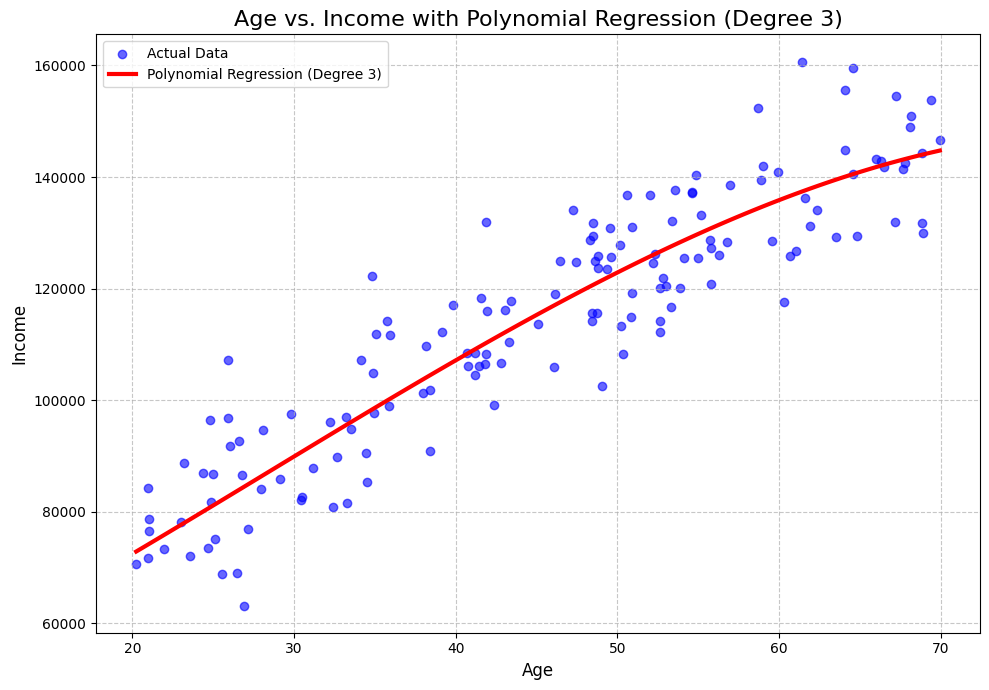


Predicted income for a 40 year old: $107,161.39


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [10]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os # For potential real data loading checks

# --- Configuration ---
# Set this to True if you want to use a real CSV file.
# If False, synthetic data will be generated.
USE_REAL_DATA = False
REAL_DATA_PATH = 'your_age_income_data.csv' # ONLY if USE_REAL_DATA is True
AGE_COLUMN_NAME = 'Age'                     # Replace with your actual age column name if using real data
INCOME_COLUMN_NAME = 'Income'               # Replace with your actual income column name if using real data
POLYNOMIAL_DEGREE = 3                       # Degree of the polynomial (e.g., 2 for quadratic, 3 for cubic)

print("--- Applying Polynomial Regression to Age and Income ---")

# --- 1. Data Loading or Generation ---
df = None
try:
    if USE_REAL_DATA:
        if not os.path.exists(REAL_DATA_PATH):
            raise FileNotFoundError(f"The specified data file was not found: {REAL_DATA_PATH}")
        df = pd.read_csv(REAL_DATA_PATH)
        print(f"Successfully loaded data from '{REAL_DATA_PATH}'.")

        # Basic check for required columns
        if AGE_COLUMN_NAME not in df.columns:
            raise ValueError(f"Required column '{AGE_COLUMN_NAME}' not found in the dataset.")
        if INCOME_COLUMN_NAME not in df.columns:
            raise ValueError(f"Required column '{INCOME_COLUMN_NAME}' not found in the dataset.")

    else:
        # Generate synthetic data simulating a non-linear age-income relationship
        np.random.seed(0) # for reproducibility
        ages = np.random.uniform(20, 70, 150) # Ages from 20 to 70
        # Simulate income with a quadratic component and noise
        # Income = a*age^2 + b*age + c + noise
        income_base = 50000 + 1500 * ages - 15 * (ages - 45)**2 # Quadratic part for peak around 45-50
        noise = np.random.normal(0, 10000, 150) # Add some random noise
        income = income_base + noise

        df = pd.DataFrame({AGE_COLUMN_NAME: ages, INCOME_COLUMN_NAME: income})
        print("Generated synthetic dataset for Age and Income.")
        print("Assumption: Income has a non-linear (quadratic-like) relationship with Age, plus noise.")

    print("\nDataset sample (first 5 rows):")
    print(df.head())
    print(f"\nDataset shape: {df.shape} (rows, columns)")

except FileNotFoundError as e:
    print(f"Error loading data: {e}. Please check your 'REAL_DATA_PATH'.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Error: The file '{REAL_DATA_PATH}' is empty or contains no data.")
    exit()
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file '{REAL_DATA_PATH}': {e}.")
    print("Please check for malformed CSV, incorrect delimiter, or encoding issues.")
    exit()
except ValueError as e:
    print(f"Data validation error: {e}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    exit()

# --- 2. Prepare Data (X and y) ---
try:
    X = df[[AGE_COLUMN_NAME]] # Feature (independent variable) - must be 2D
    y = df[INCOME_COLUMN_NAME]  # Target (dependent variable) - can be 1D

    # Validate that features and target are numerical
    if not pd.api.types.is_numeric_dtype(X[AGE_COLUMN_NAME]):
        raise TypeError(f"Feature column '{AGE_COLUMN_NAME}' is not numeric ({X[AGE_COLUMN_NAME].dtype}).")
    if not pd.api.types.is_numeric_dtype(y):
        raise TypeError(f"Target column '{INCOME_COLUMN_NAME}' is not numeric ({y.dtype}).")

    # Handle potential NaN values by dropping rows for simplicity
    combined_df = pd.concat([X, y], axis=1).dropna()
    X = combined_df[[AGE_COLUMN_NAME]]
    y = combined_df[INCOME_COLUMN_NAME]

    if X.empty or y.empty:
        raise ValueError("After cleaning, feature or target data is empty. Cannot proceed with training.")

    print(f"\nFeature '{AGE_COLUMN_NAME}' (X) data type: {X[AGE_COLUMN_NAME].dtype}")
    print(f"Target '{INCOME_COLUMN_NAME}' (y) data type: {y.dtype}")

except TypeError as e:
    print(f"Data type error during preparation: {e}")
    exit()
except ValueError as e:
    print(f"Data preparation error: {e}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data preparation: {e}")
    exit()

# --- 3. Split Data into Training and Testing Sets ---
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {e}")
    exit()

# --- 4. Polynomial Feature Transformation ---
try:
    # Create polynomial features transformer
    # degree: The degree of the polynomial features.
    # include_bias=False: Do not include the intercept term, as LinearRegression will handle it.
    poly_features = PolynomialFeatures(degree=POLYNOMIAL_DEGREE, include_bias=False)

    # Fit and transform the training data
    X_train_poly = poly_features.fit_transform(X_train)
    # Transform the test data (DO NOT fit again on test data)
    X_test_poly = poly_features.transform(X_test)

    print(f"\nOriginal X_train shape: {X_train.shape}")
    print(f"Transformed X_train_poly shape (with degree {POLYNOMIAL_DEGREE}): {X_train_poly.shape}")
    print(f"Example of original X_train[0]: {X_train.iloc[0].values}")
    print(f"Example of transformed X_train_poly[0]: {X_train_poly[0]}")

except Exception as e:
    print(f"Error during polynomial feature transformation: {e}")
    exit()

# --- 5. Create and Train the Linear Regression Model on Polynomial Features ---
model_poly = LinearRegression()
try:
    model_poly.fit(X_train_poly, y_train)
    print("\n--- Polynomial Regression Model Training Complete ---")
    print(f"Model Intercept (c): {model_poly.intercept_:.2f}")
    # Coefficients correspond to the polynomial features (e.g., age, age^2, age^3)
    print(f"Model Coefficients: {model_poly.coef_}")
except Exception as e:
    print(f"Error during polynomial regression model training: {e}")
    model_poly = None # Set model to None if training fails

if model_poly is not None:
    # --- 6. Make Predictions on the Transformed Test Set ---
    y_pred_poly = None
    try:
        y_pred_poly = model_poly.predict(X_test_poly)
    except NotFittedError:
        print("Error: Polynomial regression model has not been fitted yet. Cannot make predictions.")
    except Exception as e:
        print(f"Error during prediction: {e}")

    if y_pred_poly is not None:
        # --- 7. Evaluate the Polynomial Regression Model ---
        try:
            mae_poly = mean_absolute_error(y_test, y_pred_poly)
            mse_poly = mean_squared_error(y_test, y_pred_poly)
            rmse_poly = np.sqrt(mse_poly)
            r2_poly = r2_score(y_test, y_pred_poly)

            print("\n--- Polynomial Regression Model Evaluation ---")
            print(f"Mean Absolute Error (MAE): ${mae_poly:,.2f}")
            print(f"Mean Squared Error (MSE): ${mse_poly:,.2f}")
            print(f"Root Mean Squared Error (RMSE): ${rmse_poly:,.2f}")
            print(f"R-squared (R²): {r2_poly:.4f}")
        except Exception as e:
            print(f"Error during model evaluation: {e}")

        # --- 8. Visualize the Results ---
        try:
            plt.figure(figsize=(10, 7))

            # Plot original data points
            plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

            # To plot the smooth polynomial curve, create a sorted range of ages
            # and transform them using the *same* poly_features transformer
            X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            X_range_poly = poly_features.transform(X_range)
            y_range_pred = model_poly.predict(X_range_poly)

            plt.plot(X_range, y_range_pred, color='red', linewidth=3, label=f'Polynomial Regression (Degree {POLYNOMIAL_DEGREE})')

            plt.title(f'Age vs. Income with Polynomial Regression (Degree {POLYNOMIAL_DEGREE})', fontsize=16)
            plt.xlabel(AGE_COLUMN_NAME, fontsize=12)
            plt.ylabel(INCOME_COLUMN_NAME, fontsize=12)
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error during plotting: {e}")

        # --- Example Prediction (Optional) ---
        try:
            # Predict for a specific age (e.g., 40 years old)
            new_age = np.array([[40]])
            new_age_poly = poly_features.transform(new_age)
            predicted_income = model_poly.predict(new_age_poly)
            print(f"\nPredicted income for a {new_age[0,0]} year old: ${predicted_income[0]:,.2f}")
        except NotFittedError:
            print("\nCannot make example prediction: Polynomial regression model was not successfully fitted.")
        except Exception as e:
            print(f"\nError during example prediction: {e}")
    else:
        print("\nSkipping evaluation and visualization due to prediction error.")
else:
    print("\nSkipping prediction, evaluation, and visualization as model training failed.")

Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

--- Task 2: Compare Simple Linear vs. Higher-Degree Polynomial Regression ---


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Generated synthetic dataset for Age and Income.

Dataset sample (first 5 rows):
         Age         Income
0  47.440675  124835.914675
1  55.759468  120908.702195
2  50.138169  127793.623268
3  47.244159  134054.553937
4  41.182740  104609.859241

Training data shape: (120, 1), Test data shape: (30, 1)

--- Training Simple Linear Regression Model (Degree 1) ---
Simple Linear Regression R²: 0.7728
Simple Linear Regression MAE: $7,812.95
Simple Linear Regression RMSE: $9,612.12

--- Training Polynomial Regression Model (Degree 3) ---
Polynomial Regression (Degree 3) R²: 0.7692
Polynomial Regression (Degree 3) MAE: $8,132.93
Polynomial Regression (Degree 3) RMSE: $9,686.47

--- Visualizing Both Regression Fits ---


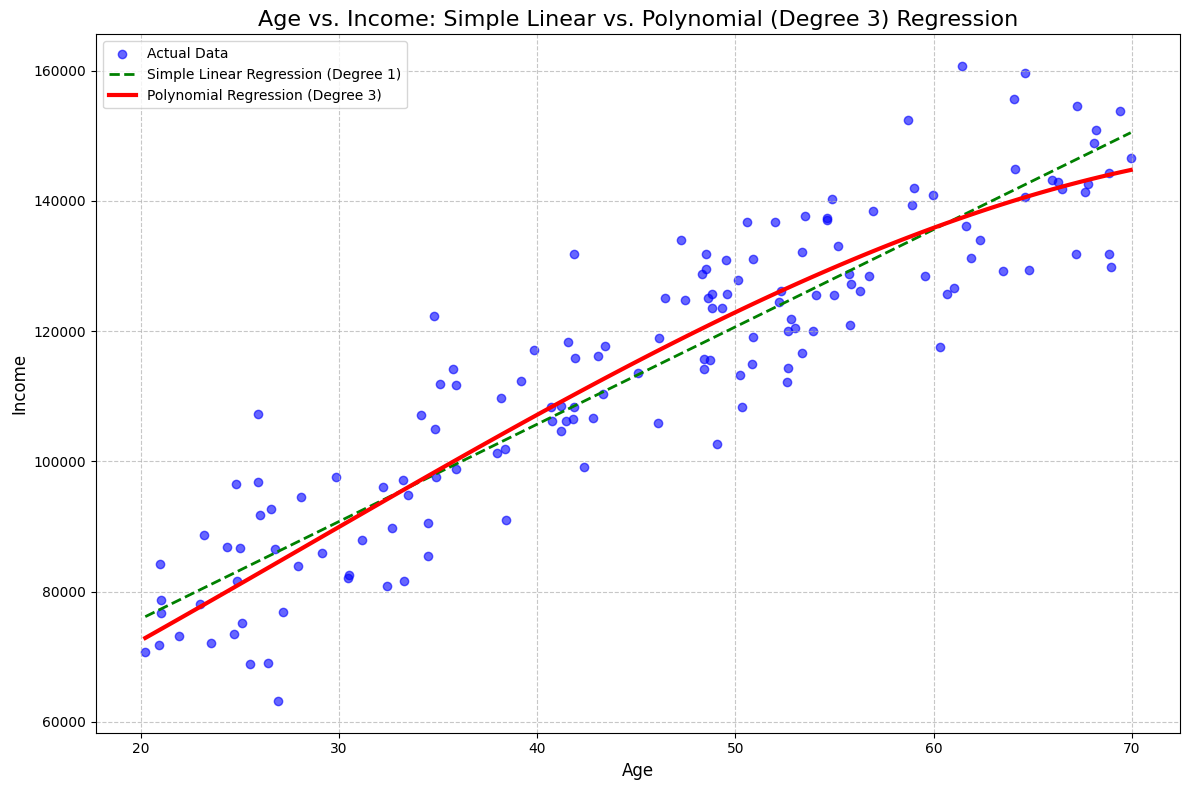


Visual comparison shows how polynomial regression can better capture non-linear trends.
The red curve (polynomial) generally follows the data's true curve more closely than the green line (linear).


In [11]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import NotFittedError
import os

# --- Configuration ---
# Set this to True if you want to use a real CSV file.
# If False, synthetic data will be generated.
USE_REAL_DATA = False
REAL_DATA_PATH = 'your_age_income_data.csv' # ONLY if USE_REAL_DATA is True
AGE_COLUMN_NAME = 'Age'                     # Replace with your actual age column name if using real data
INCOME_COLUMN_NAME = 'Income'               # Replace with your actual income column name if using real data
SIMPLE_LINEAR_DEGREE = 1                    # Implicit for Simple Linear Regression
HIGHER_POLYNOMIAL_DEGREE = 3                # Degree for the higher-degree polynomial fit

print("--- Task 2: Compare Simple Linear vs. Higher-Degree Polynomial Regression ---")

# --- 1. Data Loading or Generation (Re-using logic from Task 1) ---
df = None
try:
    if USE_REAL_DATA:
        if not os.path.exists(REAL_DATA_PATH):
            raise FileNotFoundError(f"The specified data file was not found: {REAL_DATA_PATH}")
        df = pd.read_csv(REAL_DATA_PATH)
        print(f"Successfully loaded data from '{REAL_DATA_PATH}'.")

        if AGE_COLUMN_NAME not in df.columns or INCOME_COLUMN_NAME not in df.columns:
            raise ValueError(f"Required columns '{AGE_COLUMN_NAME}' or '{INCOME_COLUMN_NAME}' not found.")

    else:
        np.random.seed(0) # for reproducibility
        ages = np.random.uniform(20, 70, 150)
        # Simulate income with a quadratic component and noise
        # This relationship is clearly non-linear, making it ideal for demonstrating polynomial regression.
        income_base = 50000 + 1500 * ages - 15 * (ages - 45)**2
        noise = np.random.normal(0, 10000, 150)
        income = income_base + noise

        df = pd.DataFrame({AGE_COLUMN_NAME: ages, INCOME_COLUMN_NAME: income})
        print("Generated synthetic dataset for Age and Income.")

    print("\nDataset sample (first 5 rows):")
    print(df.head())

except Exception as e:
    print(f"Error during data loading/generation: {e}")
    exit()

# --- 2. Data Preparation (X and y) ---
try:
    X = df[[AGE_COLUMN_NAME]]
    y = df[INCOME_COLUMN_NAME]

    # Drop rows with NaN values
    initial_rows = X.shape[0]
    combined_df = pd.concat([X, y], axis=1).dropna()
    X = combined_df[[AGE_COLUMN_NAME]]
    y = combined_df[INCOME_COLUMN_NAME]
    if initial_rows - X.shape[0] > 0:
        print(f"Dropped {initial_rows - X.shape[0]} rows due to missing values.")

    if X.empty or y.empty:
        raise ValueError("Data is empty after cleaning. Cannot proceed.")

except Exception as e:
    print(f"Error during data preparation: {e}")
    exit()

# --- 3. Split Data into Training and Testing Sets ---
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nTraining data shape: {X_train.shape}, Test data shape: {X_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {e}")
    exit()

# --- Part A: Simple Linear Regression (Degree 1) ---
print("\n--- Training Simple Linear Regression Model (Degree 1) ---")
model_linear = LinearRegression()
try:
    model_linear.fit(X_train, y_train)
    y_pred_linear = model_linear.predict(X_test)

    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Simple Linear Regression R²: {r2_linear:.4f}")
    print(f"Simple Linear Regression MAE: ${mae_linear:,.2f}")
    print(f"Simple Linear Regression RMSE: ${rmse_linear:,.2f}")

except NotFittedError:
    print("Simple Linear Regression model not fitted. Check training data.")
except Exception as e:
    print(f"Error training/evaluating simple linear model: {e}")
    model_linear = None
    y_pred_linear = None

# --- Part B: Higher-Degree Polynomial Regression ---
print(f"\n--- Training Polynomial Regression Model (Degree {HIGHER_POLYNOMIAL_DEGREE}) ---")

try:
    poly_features = PolynomialFeatures(degree=HIGHER_POLYNOMIAL_DEGREE, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_pred_poly = model_poly.predict(X_test_poly)

    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Polynomial Regression (Degree {HIGHER_POLYNOMIAL_DEGREE}) R²: {r2_poly:.4f}")
    print(f"Polynomial Regression (Degree {HIGHER_POLYNOMIAL_DEGREE}) MAE: ${mae_poly:,.2f}")
    print(f"Polynomial Regression (Degree {HIGHER_POLYNOMIAL_DEGREE}) RMSE: ${rmse_poly:,.2f}")

except NotFittedError:
    print(f"Polynomial Regression (Degree {HIGHER_POLYNOMIAL_DEGREE}) model not fitted. Check training data.")
except Exception as e:
    print(f"Error training/evaluating polynomial model: {e}")
    model_poly = None
    y_pred_poly = None


# --- 4. Visualize Both Fits ---
if model_linear is not None and model_poly is not None:
    print("\n--- Visualizing Both Regression Fits ---")
    plt.figure(figsize=(12, 8))

    # Plot original data points
    plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

    # Plot Simple Linear Regression line
    # Create a smooth range for plotting the linear line
    X_linear_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_linear_pred_range = model_linear.predict(X_linear_range)
    plt.plot(X_linear_range, y_linear_pred_range, color='green', linestyle='--', linewidth=2, label='Simple Linear Regression (Degree 1)')

    # Plot Higher-Degree Polynomial Regression curve
    # Use the same range and polynomial transformer
    X_poly_range = poly_features.transform(X_linear_range) # Re-use X_linear_range for consistency
    y_poly_pred_range = model_poly.predict(X_poly_range)
    plt.plot(X_linear_range, y_poly_pred_range, color='red', linewidth=3, label=f'Polynomial Regression (Degree {HIGHER_POLYNOMIAL_DEGREE})')

    plt.title(f'Age vs. Income: Simple Linear vs. Polynomial (Degree {HIGHER_POLYNOMIAL_DEGREE}) Regression', fontsize=16)
    plt.xlabel(AGE_COLUMN_NAME, fontsize=12)
    plt.ylabel(INCOME_COLUMN_NAME, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nVisual comparison shows how polynomial regression can better capture non-linear trends.")
    print("The red curve (polynomial) generally follows the data's true curve more closely than the green line (linear).")
else:
    print("\nSkipping visualization due to errors in model training.")

Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

--- Task 3: Dataset with Cyclical Patterns (Temperature by Hour) ---
Generated synthetic dataset simulating a daily temperature cycle.
Cyclical Period set to: 24 hours.

Dataset sample (first 5 rows):
   Hour_of_Day  Temperature
0     0.000000    10.745071
1     0.236181     9.811713
2     0.472362    11.047899
3     0.708543    12.456096
4     0.944724     9.953070

Dataset shape: (200, 2) (rows, columns)

Engineered cyclical features: 'sin_Hour_of_Day' and 'cos_Hour_of_Day'.
This transformation handles the 'wrap-around' effect of cyclical data,
where the end of a cycle (e.g., 23:59) is close to the beginning (e.g., 00:00).

DataFrame with new features (first 5 rows):
   Hour_of_Day  Temperature  sin_Hour_of_Day  cos_Hour_of_Day
0     0.000000    10.745071         0.000000         1.000000
1     0.236181     9.811713         0.061793         0.998089
2     0.472362    11.047899         0.123349         0.992363
3     0.708543    12.456096         0.184434         0.982845
4     0.9447

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


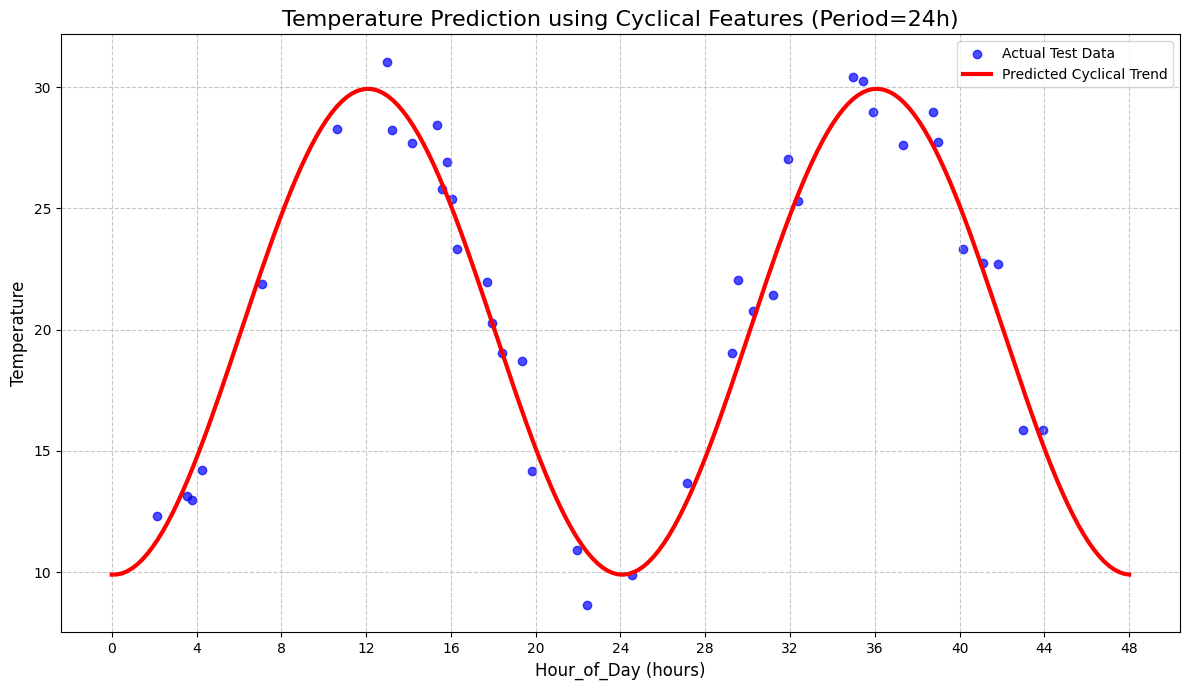


Predicted Temperature at hour 8: 24.73


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import NotFittedError

# --- Configuration ---
# Define the period of the cycle (e.g., 24 hours for a daily cycle)
CYCLE_PERIOD = 24
TARGET_COLUMN_NAME = 'Temperature'
FEATURE_COLUMN_NAME = 'Hour_of_Day'

print("--- Task 3: Dataset with Cyclical Patterns (Temperature by Hour) ---")

# --- 1. Generate Synthetic Cyclical Data (e.g., daily temperature cycle) ---
try:
    np.random.seed(42) # for reproducibility

    # Generate hours for two full cycles to show the wrap-around
    hours = np.linspace(0, CYCLE_PERIOD * 2 - 1, 200) # 200 points over almost 2 days

    # Simulate temperature with a sine wave pattern + noise
    # Base temperature + amplitude * sin(2 * pi * hour / period) + noise
    # Peaks around hour 12 (mid-day) and lows around hour 0/24 (mid-night)
    amplitude = 10
    base_temp = 20
    temperature = base_temp + amplitude * np.sin(2 * np.pi * (hours - 6) / CYCLE_PERIOD) # Shift peak to later
    noise = np.random.normal(0, 1.5, hours.shape[0]) # Add some random noise
    temperature += noise

    df = pd.DataFrame({FEATURE_COLUMN_NAME: hours, TARGET_COLUMN_NAME: temperature})

    print("Generated synthetic dataset simulating a daily temperature cycle.")
    print(f"Cyclical Period set to: {CYCLE_PERIOD} hours.")
    print("\nDataset sample (first 5 rows):")
    print(df.head())
    print(f"\nDataset shape: {df.shape} (rows, columns)")

except Exception as e:
    print(f"Error during data generation: {e}")
    exit()

# --- 2. Feature Engineering for Cyclical Data ---
# Convert the cyclical feature (Hour_of_Day) into sine and cosine components.
# This allows a linear model to understand the cyclical nature.
# Formula: sin(2 * pi * value / period), cos(2 * pi * value / period)
try:
    df[f'sin_{FEATURE_COLUMN_NAME}'] = np.sin(2 * np.pi * df[FEATURE_COLUMN_NAME] / CYCLE_PERIOD)
    df[f'cos_{FEATURE_COLUMN_NAME}'] = np.cos(2 * np.pi * df[FEATURE_COLUMN_NAME] / CYCLE_PERIOD)

    print(f"\nEngineered cyclical features: 'sin_{FEATURE_COLUMN_NAME}' and 'cos_{FEATURE_COLUMN_NAME}'.")
    print("This transformation handles the 'wrap-around' effect of cyclical data,")
    print("where the end of a cycle (e.g., 23:59) is close to the beginning (e.g., 00:00).")
    print("\nDataFrame with new features (first 5 rows):")
    print(df.head())

except Exception as e:
    print(f"Error during feature engineering: {e}")
    exit()

# --- 3. Prepare Data (X and y) ---
try:
    # X will now include the new sine and cosine features
    X = df[[f'sin_{FEATURE_COLUMN_NAME}', f'cos_{FEATURE_COLUMN_NAME}']]
    y = df[TARGET_COLUMN_NAME]

    # Basic data type validation and NaN handling
    if not pd.api.types.is_numeric_dtype(y):
        raise TypeError(f"Target column '{TARGET_COLUMN_NAME}' is not numeric ({y.dtype}).")
    if X.isnull().sum().sum() > 0:
        initial_rows = X.shape[0]
        combined_df = pd.concat([X, y, df[FEATURE_COLUMN_NAME]], axis=1).dropna() # Keep original hour for plotting
        X = combined_df[[f'sin_{FEATURE_COLUMN_NAME}', f'cos_{FEATURE_COLUMN_NAME}']]
        y = combined_df[TARGET_COLUMN_NAME]
        df_for_plotting = combined_df # Update df_for_plotting if rows dropped
        if initial_rows - X.shape[0] > 0:
            print(f"Dropped {initial_rows - X.shape[0]} rows due to missing values in engineered features.")
    else:
        df_for_plotting = df.copy() # Use the original df for plotting if no NaNs were dropped

    if X.empty or y.empty:
        raise ValueError("Data is empty after cleaning. Cannot proceed.")

    print(f"\nFeatures (X) shape: {X.shape}, Target (y) shape: {y.shape}")

except Exception as e:
    print(f"Error during data preparation: {e}")
    exit()

# --- 4. Split Data into Training and Testing Sets ---
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")
except Exception as e:
    print(f"Error during data splitting: {e}")
    exit()

# --- 5. Create and Train the Linear Regression Model ---
model_cyclical = LinearRegression()
try:
    print("\n--- Training Linear Regression Model with Cyclical Features ---")
    model_cyclical.fit(X_train, y_train)
    print("Model training complete.")
    print(f"Model Intercept: {model_cyclical.intercept_:.2f}")
    print(f"Model Coefficients (sin_hour, cos_hour): {model_cyclical.coef_}")
except Exception as e:
    print(f"Error during model training: {e}")
    model_cyclical = None

if model_cyclical is not None:
    # --- 6. Make Predictions on the Transformed Test Set ---
    y_pred_cyclical = None
    try:
        y_pred_cyclical = model_cyclical.predict(X_test)
    except NotFittedError:
        print("Error: Model has not been fitted yet. Cannot make predictions.")
    except Exception as e:
        print(f"Error during prediction: {e}")

    if y_pred_cyclical is not None:
        # --- 7. Evaluate the Model ---
        try:
            mae_cyclical = mean_absolute_error(y_test, y_pred_cyclical)
            mse_cyclical = mean_squared_error(y_test, y_pred_cyclical)
            rmse_cyclical = np.sqrt(mse_cyclical)
            r2_cyclical = r2_score(y_test, y_pred_cyclical)

            print("\n--- Model Evaluation ---")
            print(f"Mean Absolute Error (MAE): {mae_cyclical:,.2f}")
            print(f"Mean Squared Error (MSE): {mse_cyclical:,.2f}")
            print(f"Root Mean Squared Error (RMSE): {rmse_cyclical:,.2f}")
            print(f"R-squared (R²): {r2_cyclical:.4f}")
        except Exception as e:
            print(f"Error during model evaluation: {e}")

        # --- 8. Visualize the Results ---
        try:
            plt.figure(figsize=(12, 7))

            # Plot original data points (using the original hour column for x-axis)
            # Need to get original hours corresponding to test set for plotting original points
            test_hours_original = df_for_plotting.loc[y_test.index, FEATURE_COLUMN_NAME]
            plt.scatter(test_hours_original, y_test, color='blue', label='Actual Test Data', alpha=0.7)

            # To plot the smooth predicted curve, create a dense range of hours
            # for the full cycle (and possibly beyond for visualization)
            hours_for_plot = np.linspace(0, CYCLE_PERIOD * 2, 200).reshape(-1, 1) # Plot over two cycles
            sin_hours_for_plot = np.sin(2 * np.pi * hours_for_plot / CYCLE_PERIOD)
            cos_hours_for_plot = np.cos(2 * np.pi * hours_for_plot / CYCLE_PERIOD)
            X_plot_transformed = np.hstack([sin_hours_for_plot, cos_hours_for_plot])

            # Predict using the transformed plot range
            y_pred_plot = model_cyclical.predict(X_plot_transformed)

            plt.plot(hours_for_plot, y_pred_plot, color='red', linewidth=3, label='Predicted Cyclical Trend')

            plt.title(f'{TARGET_COLUMN_NAME} Prediction using Cyclical Features (Period={CYCLE_PERIOD}h)', fontsize=16)
            plt.xlabel(f'{FEATURE_COLUMN_NAME} (hours)', fontsize=12)
            plt.ylabel(TARGET_COLUMN_NAME, fontsize=12)
            plt.xticks(np.arange(0, CYCLE_PERIOD * 2 + 1, 4)) # Mark hours clearly
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error during plotting: {e}")

        # --- Example Prediction (Optional) ---
        try:
            # Predict for a specific hour (e.g., 8 AM)
            example_hour = np.array([[8]])
            sin_example_hour = np.sin(2 * np.pi * example_hour / CYCLE_PERIOD)
            cos_example_hour = np.cos(2 * np.pi * example_hour / CYCLE_PERIOD)
            X_example_transformed = np.hstack([sin_example_hour, cos_example_hour])

            predicted_value = model_cyclical.predict(X_example_transformed)
            print(f"\nPredicted {TARGET_COLUMN_NAME} at hour {example_hour[0,0]}: {predicted_value[0]:,.2f}")
        except NotFittedError:
            print("\nCannot make example prediction: Model was not successfully fitted.")
        except Exception as e:
            print(f"\nError during example prediction: {e}")

    else:
        print("\nSkipping evaluation and visualization due to prediction error.")
else:
    print("\nSkipping prediction, evaluation, and visualization as model training failed.")
